In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import argrelextrema

In [21]:
data = pd.read_csv('/Users/alessandrocantarelli/Documents/Tec/sleep_episodes/00001/sleep 1/sleep_1.csv')
data.head()

,t,x,y,z,annotation0,arm_angle,change
0,132.043952,-0.196,-0.850,0.480,p_lie,28.822505,NaN
1,132.094000,-0.264,-0.846,0.572,p_lie,32.839298,4.016794
2,132.143856,-0.248,-0.798,0.558,p_lie,33.732823,0.893524
3,132.193904,-0.282,-0.752,0.542,p_lie,34.013614,0.280791
4,132.243952,-0.122,-0.858,0.578,p_lie,33.701348,-0.312265


In [22]:
data_raw= pd.read_csv('/Users/alessandrocantarelli/Documents/Tec/SPHEREdata/train/00001/acceleration.csv')
df = pd.DataFrame(data_raw, columns=['t','x','y','z'])
df.head()

,t,x,y,z
0,0.017856,0.944,-0.280,0.152
1,0.067904,0.944,-0.292,0.156
2,0.117952,0.946,-0.286,0.156
3,0.168000,0.942,-0.288,0.160
4,0.217856,0.946,-0.286,0.158


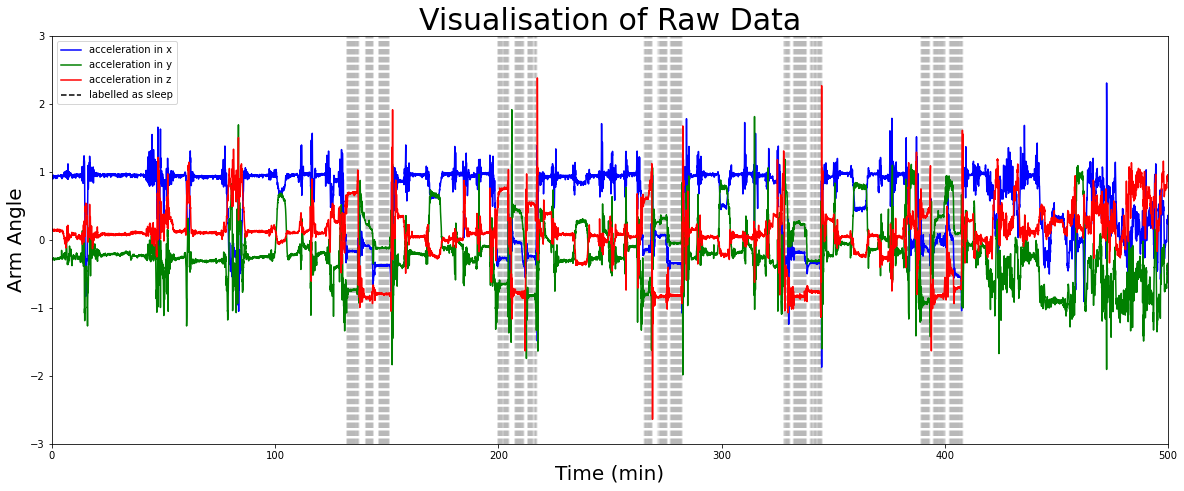

In [61]:
plt.figure(figsize=(20, 7.5))
for idx in data['t']:
    plt.axvline(x=idx, linestyle="dashed", c='black', alpha=0.02)
plt.plot(df['t'], df['x'], label='acceleration in x', color='b')
plt.plot(df['t'], df['y'], label='acceleration in y', color='g')
plt.plot(df['t'], df['z'], label='acceleration in z', color='r')
plt.plot(0, 0, label='labelled as sleep', linestyle="dashed", c='black')
plt.xlabel('Time (min)', fontsize='20')
plt.ylabel('Arm Angle', fontsize='20')
plt.title('Visualisation of Raw Data', fontsize='30')
plt.ylim(-3, 3)
plt.xlim(0, 500)
plt.legend()
plt.show()

In [30]:
def sleep_interuptions(df):
    sleep_interuptions = []
    for i in range(len(df)-1):
        if (df['t'].iloc[i+1] - df['t'].iloc[i]) > 5:
            sleep_interuptions.append(i)
        else:
            pass
    return sleep_interuptions

sleep_interuptions = sleep_interuptions(data)
print(sleep_interuptions)

[279, 535, 797, 1070]


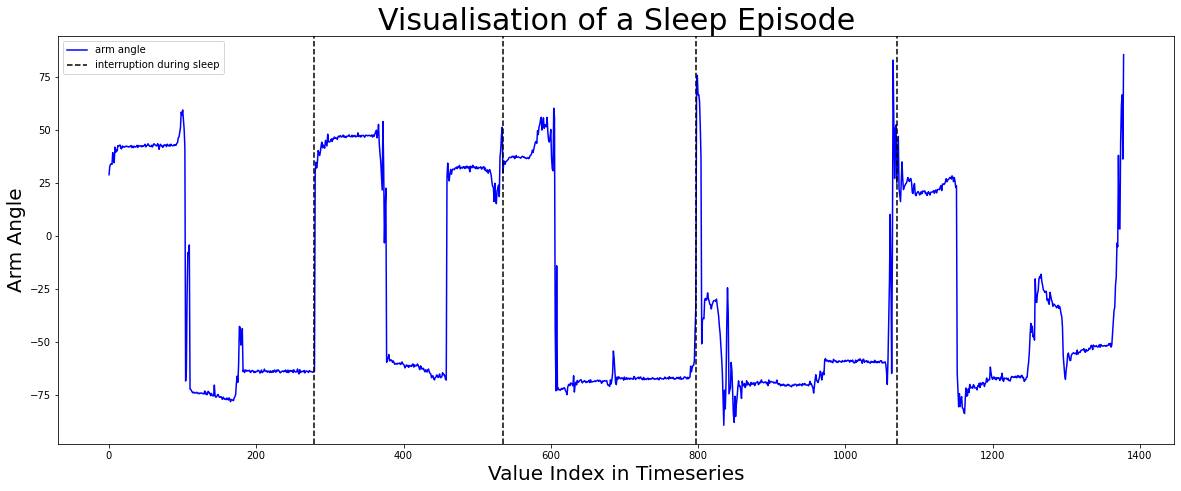

In [42]:
plt.figure(figsize=(20, 7.5))
plt.plot(data.index.values, data['arm_angle'], label='arm angle', color='b')
plt.plot(0, 0, label='interruption during sleep', linestyle="dashed", c='black')
for idx in sleep_interuptions:
    plt.axvline(x=idx, linestyle="dashed", c='black')
plt.xlabel('Value Index in Timeseries', fontsize='20')
plt.ylabel('Arm Angle', fontsize='20')
plt.title('Visualisation of a Sleep Episode', fontsize='30')
plt.legend()
plt.show()